# Задача регрессии для предсказания удовлетворенности работников

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('employee_survey.csv', sep=",")
# Просмотр датасета
#display(df)
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3025 non-null   int64  
 1   Gender                 3025 non-null   object 
 2   Age                    3025 non-null   int64  
 3   MaritalStatus          3025 non-null   object 
 4   JobLevel               3025 non-null   object 
 5   Experience             3025 non-null   int64  
 6   Dept                   3025 non-null   object 
 7   EmpType                3025 non-null   object 
 8   WLB                    3025 non-null   int64  
 9   WorkEnv                3025 non-null   int64  
 10  PhysicalActivityHours  3025 non-null   float64
 11  Workload               3025 non-null   int64  
 12  Stress                 3025 non-null   int64  
 13  SleepHours             3025 non-null   float64
 14  CommuteMode            3025 non-null   object 
 15  Comm

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,1513.000000,35.741818,9.082645,3.061157,3.029091,2.029620,2.966612,1.736529,7.005983,13.473719,4.253554,16.516033,2.383140,37.301653,3.386777
std,873.386608,10.191833,7.073344,1.447001,1.415317,0.966014,1.401486,1.064242,1.002652,8.395249,3.382501,6.638419,3.058131,13.569772,1.260599
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,757.000000,27.000000,3.000000,2.000000,2.000000,1.300000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1513.000000,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,40.000000,4.000000
75%,2269.000000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,21.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


In [6]:
# Проверка на пустые значения и удаление дубликатов
print("\nПропущенные значения:")
print(df.isnull().sum())
df = df.drop_duplicates()

# Разделение данных на набор зависимых переменных и метку
data = df.drop(["JobSatisfaction"],axis=1)
target = df["JobSatisfaction"]

# Вывод столбцов с категориальными признаками
category_df = data.select_dtypes(include='object')
category_df.head()




Пропущенные значения:
EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64


,Gender,MaritalStatus,JobLevel,Dept,EmpType,CommuteMode,EduLevel
0,Male,Married,Mid,IT,Full-Time,Car,Bachelor
1,Female,Married,Mid,Finance,Full-Time,Car,Bachelor
2,Female,Single,Intern/Fresher,Marketing,Full-Time,Motorbike,Bachelor
3,Female,Married,Junior,IT,Contract,Public Transport,Bachelor
4,Other,Single,Junior,Sales,Part-Time,Car,Bachelor


In [7]:
# Кодирование данных
categorical_features = category_df.columns.tolist()
print('Столбцы для кодирования:\n',categorical_features)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for each in categorical_features:
    category_df[each] = encoder.fit_transform(category_df[each])
    category_df_check=encoder.classes_

numeric_df = data.select_dtypes(include='number')

# Новый набор данных с закодировннными категориями
new_data =pd.merge(numeric_df, category_df, left_index=True, right_index=True)
new_df=pd.merge(new_data, target, left_index=True, right_index=True)
new_df.head()



Столбцы для кодирования:
 ['Gender', 'MaritalStatus', 'JobLevel', 'Dept', 'EmpType', 'CommuteMode', 'EduLevel']


,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,...,NumReports,TrainingHoursPerYear,Gender,MaritalStatus,JobLevel,Dept,EmpType,CommuteMode,EduLevel,JobSatisfaction
0,6,32,7,1,1,2.5,2,1,7.6,20,...,0,33.5,1,1,3,3,1,1,0,5
1,11,34,12,1,1,1.8,2,2,7.9,15,...,0,36.0,0,1,3,1,1,1,0,5
2,33,23,1,2,4,2.1,5,4,6.5,17,...,0,10.5,0,2,0,5,1,2,0,5
3,20,29,6,2,2,1.9,3,1,7.5,13,...,0,23.0,0,1,1,3,0,3,0,5
4,28,23,1,3,1,3.7,2,1,4.9,20,...,0,20.5,2,2,1,7,2,1,0,5


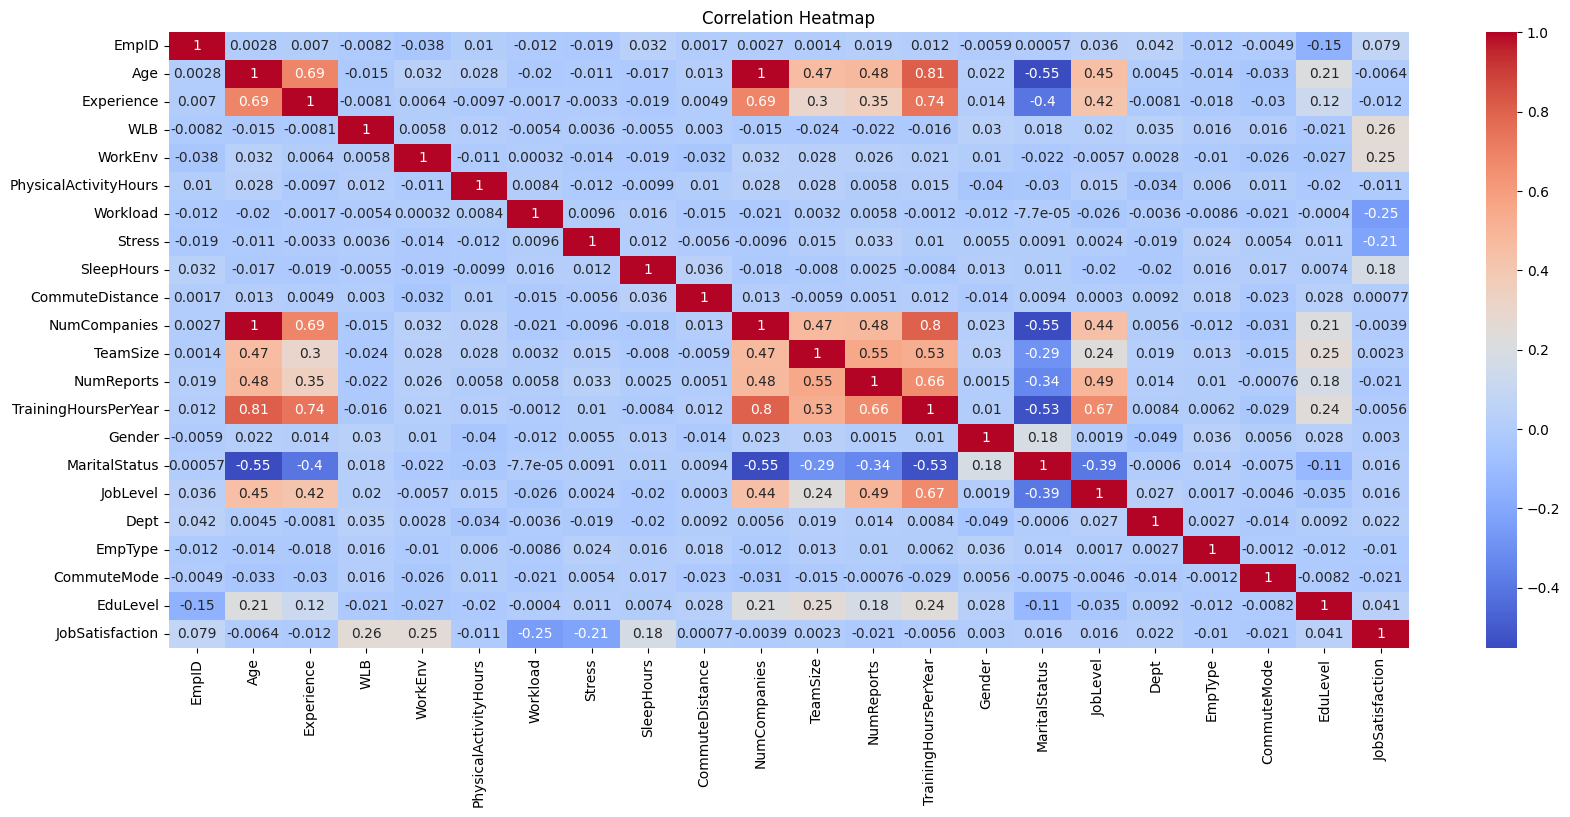

In [8]:
# Кореляция переменных
plt.figure(figsize=(20, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Проверка распределения целевой метки:
 JobSatisfaction
1     417
2     277
3     566
4    1249
5     516
Name: JobSatisfaction, dtype: int64


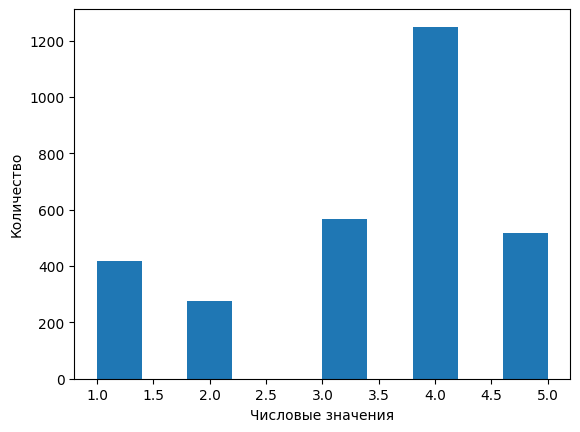

In [10]:
# Убираем некоторые переменные
X=new_data.drop(["EmpID","Age","CommuteDistance","NumCompanies","TeamSize","NumReports","TrainingHoursPerYear"],axis=1)
Y=target

# Проверка распределения целевой метки
result_target = df.groupby('JobSatisfaction', observed=False)['JobSatisfaction'].count()
print('\nПроверка распределения целевой метки:\n',result_target)
plt.hist(target)
plt.xlabel('Числовые значения')
plt.ylabel('Количество')
plt.title('')
plt.show()

#  Регрессоры

*****************
Метрики качества:
*****************
MAE: 0.8175
MSE: 1.0575
RMSE: 1.0283
R²: 0.3284


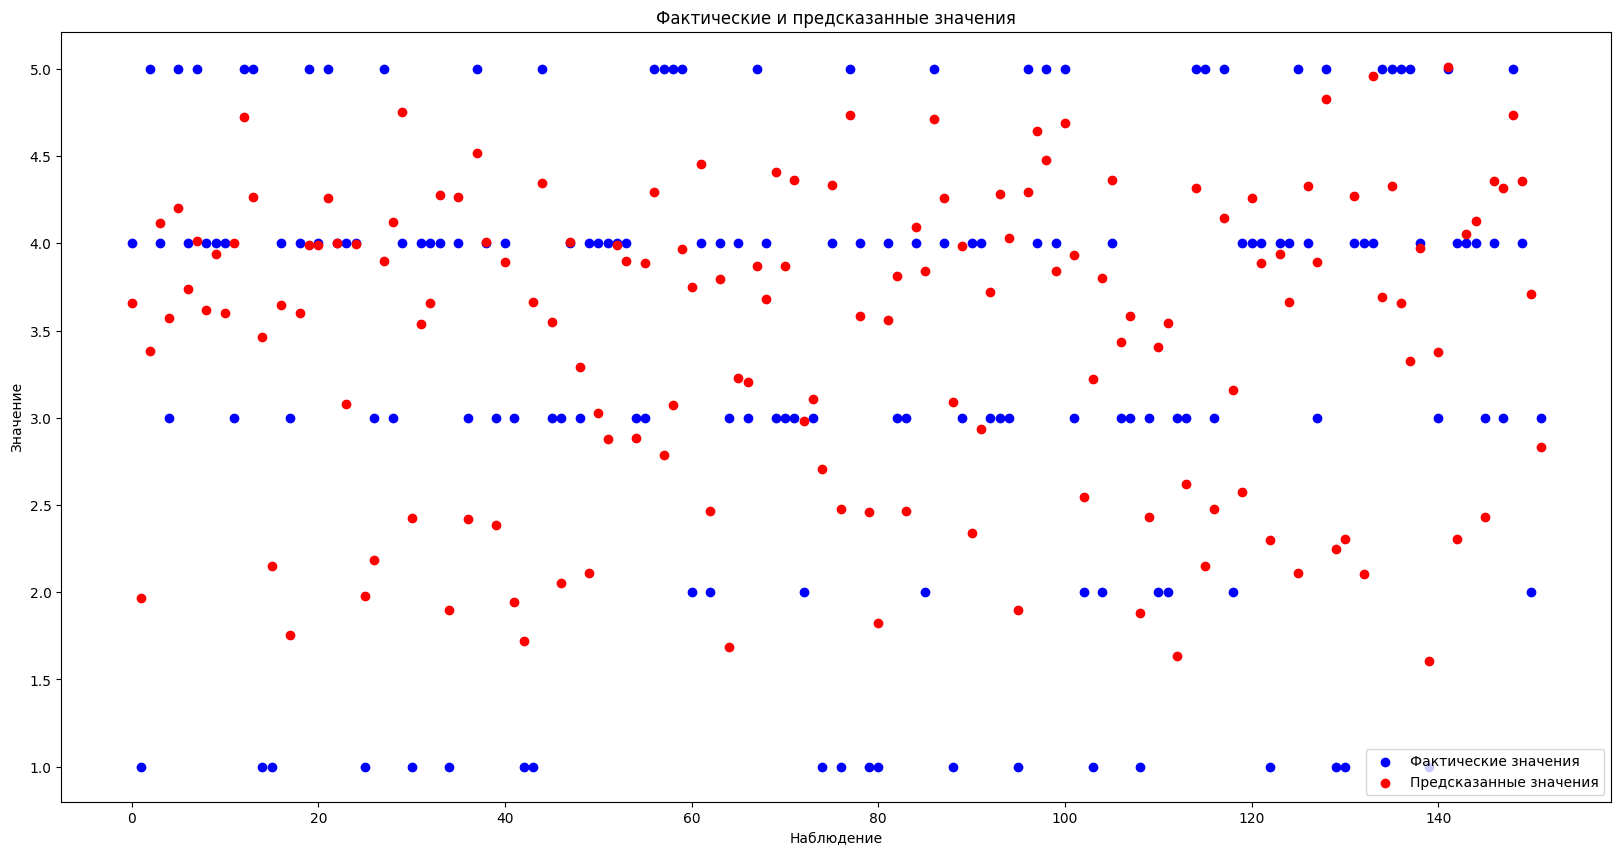

In [16]:
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=177)

# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor(max_depth = 4,n_estimators = 222,loss='squared_error', random_state=0) # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 2873, number of used features: 14
[LightGBM] [Info] Start training from score 3.384267
MAE: 0.8317489888051363
MSE: 1.0704562739748322
R²: 0.3201808203981713


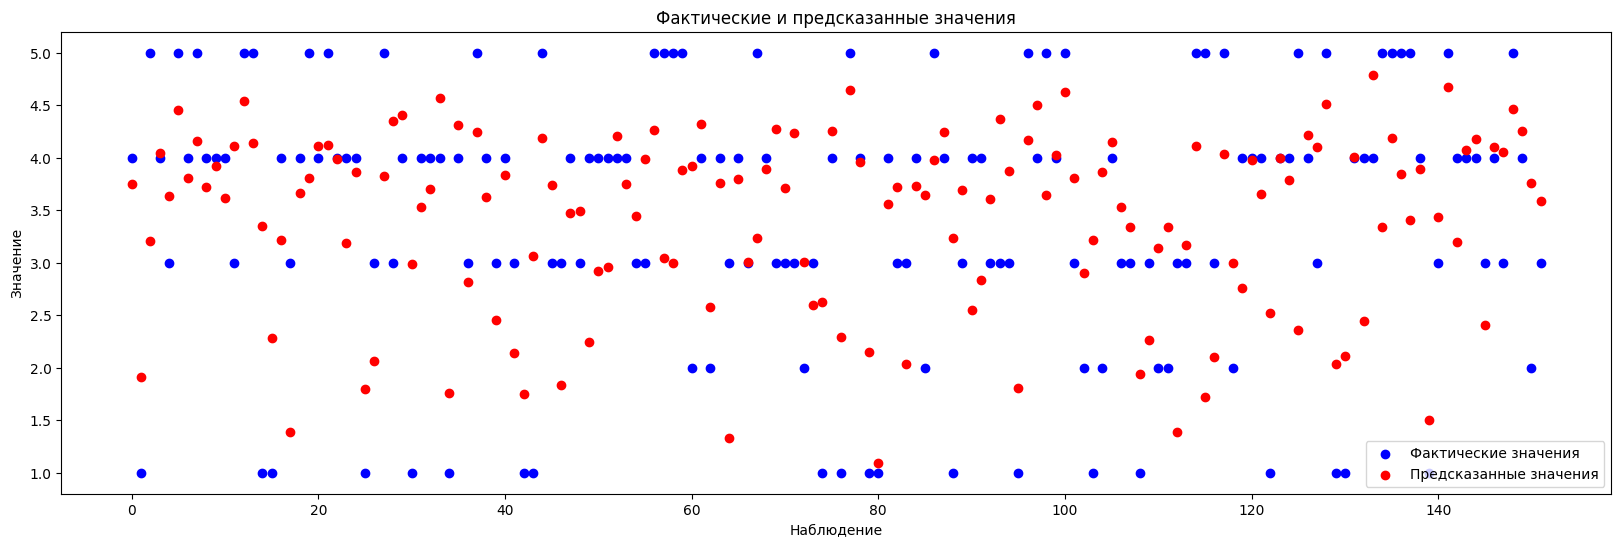

In [43]:
# Регрессор Light GBM без подбора параметров
from lightgbm import LGBMRegressor

# Создание и обучение модели LGBMRegressor
model = LGBMRegressor(random_state=0,force_col_wise='true')
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


MAE: 0.85269695520401
MSE: 1.1062275171279907
R²: 0.29746341705322266


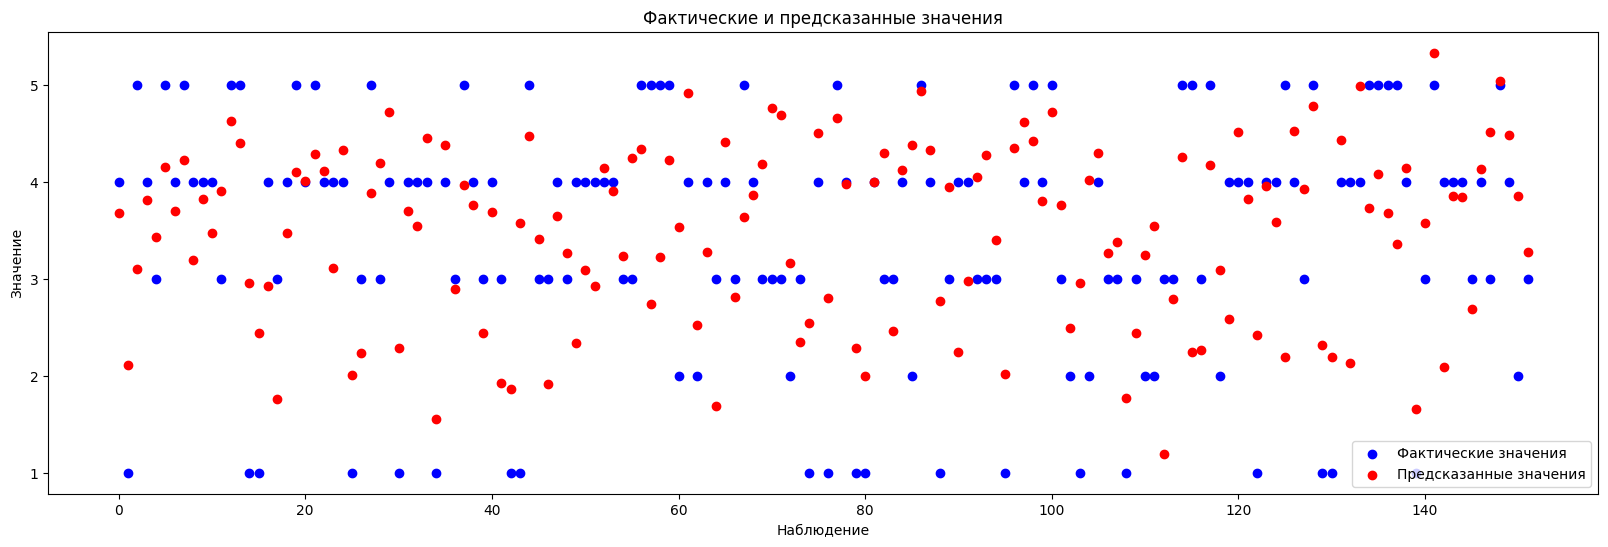

In [26]:
# XGBoost - Экстремальный градиентный бустинг.
from xgboost import XGBRegressor

# Определение модели
model = XGBRegressor(max_depth = 3,  n_estimators = 222)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


MAE: 0.836386832602015
MSE: 1.0992717909473655
R²: 0.30188082853084286


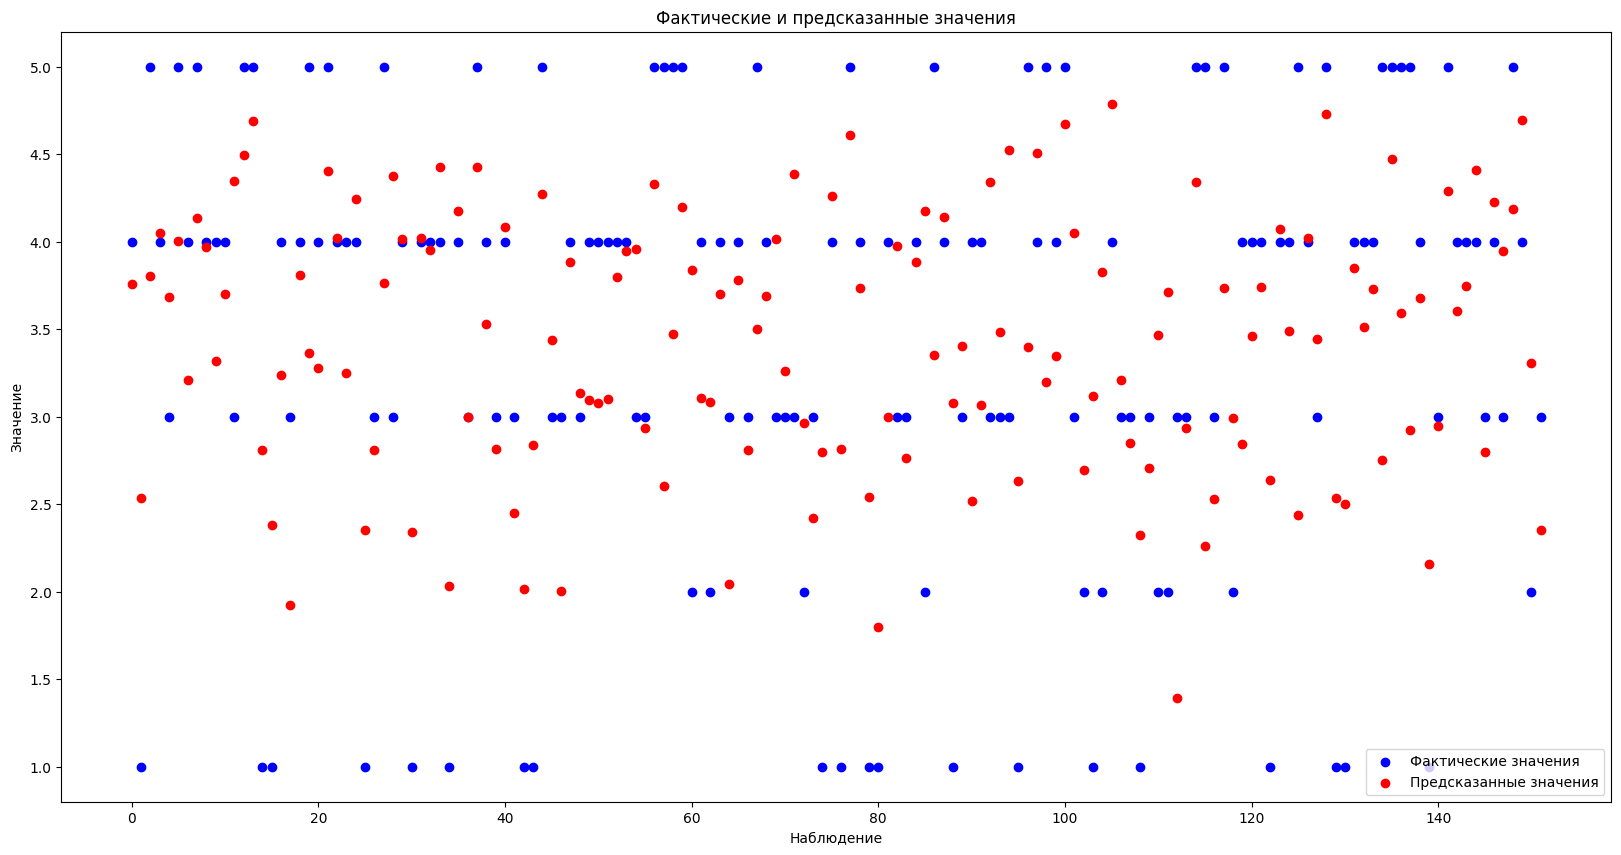

In [37]:
#Гребневая регрессия (ридж-регрессия)
from sklearn.linear_model import RidgeCV
model = RidgeCV()
model.fit(X_train, y_train)

#Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

In [33]:
pip install catboost

MAE: 0.8134495202948455
MSE: 1.0389378487837402
R²: 0.34019735958494957


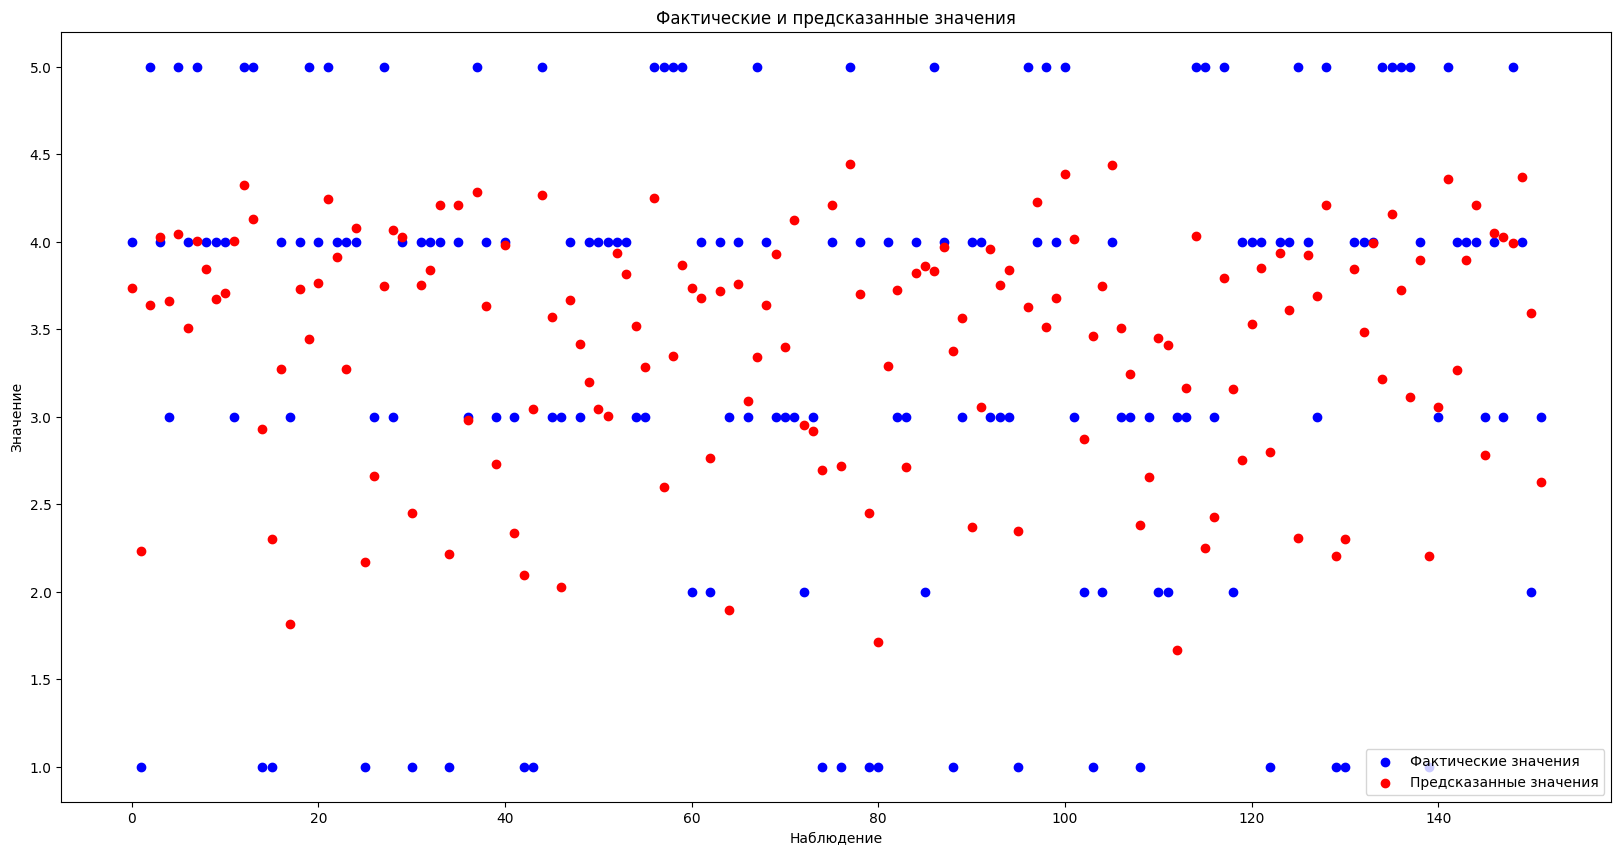

In [40]:
from catboost import CatBoostRegressor

# Создание и обучение модели CatBoost для регрессии
model = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=123, verbose=0)
model.fit(X_train, y_train)

#Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

MAE: 0.8411572271794364
MSE: 1.1137988518652875
R²: 0.29265506669885655


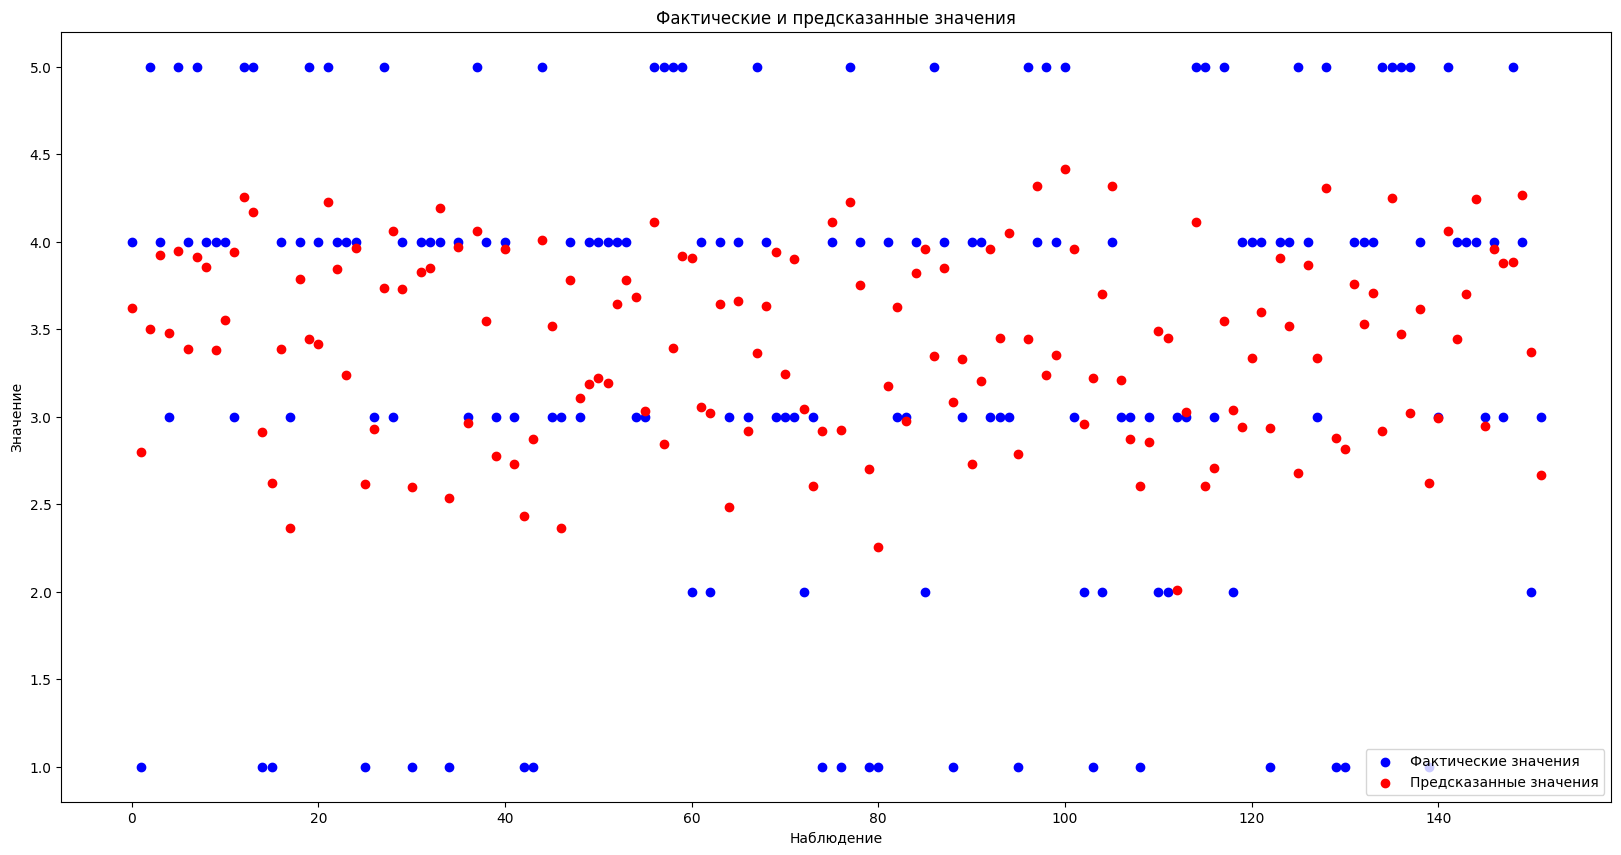

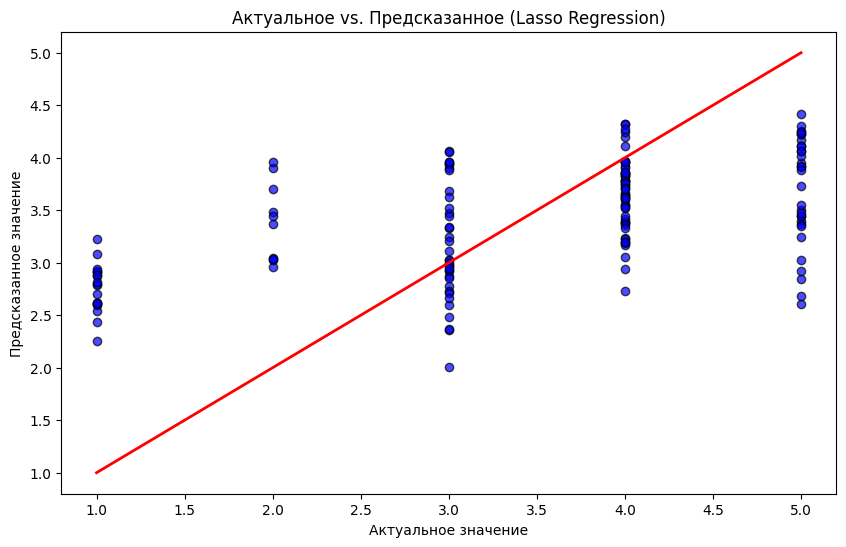

In [28]:
# Регрессия LASSO
from sklearn.linear_model import Lasso

# Создание и обучение модели регрессии Lasso
model = Lasso(alpha=0.1)  # Здесь alpha - гиперпараметр регуляризации L1
model.fit(X_train, y_train)

#Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Актуальное значение")
plt.ylabel("Предсказанное значение")
plt.title("Актуальное vs. Предсказанное (Lasso Regression)")
plt.show()